In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [63]:
df_prueba = pd.DataFrame({
"es_pepito":['s','n','n','s','n','s','n','s','n','s','s','n','s','s','n','s','s','n','n','n','n','s','s','s'],
"es_pepito2":['s','s','s','s','n','s','n','s',None,'s','s','n','s','s',None,'s','s','n','n','n',None,'s','s','s'],
"sexo":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"sexo_2":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"Datos_B":[np.random.randint(0,5) for _ in range(24)],
"Datos_C":[np.random.randint(0,1) for _ in range(24)],
"Datos_D": [np.random.randint(0,1000) for _ in range(24)],
"Datos_E": [np.random.randint(0,1000) for _ in range(24)],
"Datos_F": [np.random.randint(0,1000) for _ in range(24)],
"Datos_G": [np.random.randint(0,1000) for _ in range(24)],
"Datos_cate_A": ['Grupo '+str(np.random.randint(0,6)) for _ in range(24)],
"Datos_cate_B": ['Grupo '+str(np.random.randint(0,4)) for _ in range(24)],
"Datos_cate_C": ['Grupo '+str(np.random.randint(0,5)) for _ in range(24)],

})

In [64]:

class DF_exploracion(pd.DataFrame):

    def __init__(self, *args, **kw):
        super(DF_exploracion, self).__init__(*args, **kw)
        self.cuanti=pd.DataFrame
        self.cuali=pd.DataFrame
        self.dico=pd.DataFrame
        self.cate=pd.DataFrame
        self.dummy=pd.DataFrame
        self.df=pd.DataFrame
        self.df_limpio=pd.DataFrame
        self.normal_cuatis=[]
        self.normal_grupos_dico=[]
        self.normal_grupos_cate=[]


    def variables(self):

        dico=[]
        cuantis=[]
        categori=[]
        eliminar=[]

        # print("|----------------------------------------------------------------------------------------------------")
        for i in self.columns: 
            if len(self[i].dropna().unique())==2:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: DICOTOMICA"
                dico.append(i)

            elif len(self[i].dropna().unique())>10:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CUANTITATIVA"
                cuantis.append(i)

            elif  len(self[i].dropna().unique())<2:
                tipo_de_var=f"SOLO {len(self[i].dropna().unique())} TIPOS, NO VALE LA COLUMNA"
                eliminar.append(i)
            else:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CATEGORICA/CUANTI"
                categori.append(i)

            print (f"|  {i} \n|   - Tipo de dato: {self[i].dtype} \n|   - Valores repetidos: {tipo_de_var} \n|   - Nulos: {self[i].isnull().sum()/len(self[i])} \n| ")

        print (f"|----------------------------------------------------------------------------------------------------\n|  TODAS: {self.columns} \n|  DICOTOMICAS: {dico} \n|  CATEGORICAS: {categori} \n|  CUANTITATIVAS: {cuantis} \n|  ELIMINAR: {eliminar}")
        print("|----------------------------------------------------------------------------------------------------")

        self.DF_cuantis(cuantis)
        self.DF_cualis(categori+dico)
        self.DF_dicotomica(dico)
        self.DF_categorica(categori)
        self.df=self
        
    def todas_col(self):
        return self.df
    
    def DF_cuantis(self,lista):
        self.cuanti=self[lista]
        
    def DF_cualis(self,lista):
        self.cuali=self[lista]
        
    def DF_dicotomica(self, lista):
        self.dico=self[lista]
        
    def DF_categorica(self, lista):
        self.cate=self[lista]   



    def limpiar_aux(self):
        
        try:
            df_nuevo=pd.DataFrame
            aux1=list(self.dico.columns)
            aux=[]
            df_nuevo=pd.get_dummies(self.df, columns=aux1)
            
            for columna in df_nuevo.columns:
                for variables in list(self.dico.columns):
                    if variables in columna:
                        aux.append(columna)
                    
            self.dummy=df_nuevo[aux]
            self[aux]=df_nuevo[aux]

            # self.df=self.drop(columns=var, axis='columns')
            # self.df= self[self.columns.difference(self.dico.columns)]
            
            print("********************** self.dummy ************\n")
            print(self.dummy)
            print("\n********************** self.df o todas_las_col() ************\n")
            print(self.df)

        except:
            print("---------------------- ERROR -----------------")



    def limpiar_dummys(self):

        b=False
        lista=list(self.dico.columns)
        for ind, i in enumerate(lista):
                if (ind+1<len(lista)):
                    if( (i in lista [ind+1]) ):
                        b=True
                        break
        if b:
            nombres_nuevos=[]
            if len(lista)>2:
                for ind, i in enumerate(lista):
                    if (ind+1<len(lista)):
                        if( (i in lista [ind+1]) ):
                            nombres_nuevos.append(i.upper())
                        else:
                            nombres_nuevos.append(i)
                    else:
                        nombres_nuevos.append(i)
                        
            aux_df=self.df

            for i,j in zip(lista,nombres_nuevos):
                aux_df.rename(columns={i:j},inplace=True)
                
            self.df=aux_df
            self.dico.columns=nombres_nuevos
            
            self.limpiar_aux()
        else: 
            self.limpiar_aux()



    def estadistica_descriptiva_cuantis(self):

        print("----------------------------------------------------------------------------------------------------\nDESCRIPCIÓN")
        print (self.cuanti.describe())
        print("\n")
        print("----------------------------------------------------------------------------------------------------\nCUARTILES")
        print (self.cuanti.quantile([0.05,0.25,0.5,0.75,0.95]))
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")


        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        # df_auxiliar = self.groupby('sexo').apply(lambda x: pd.Series(shapiro(x), index=['W','P'])).reset_index()
        # print(df_auxiliar)
                
        for a in list(aux1.values):
            
            for b in list(aux.values):
                
                print("++++++++++++++++++++++++++++  "+a+" y "+b+"  ++++++++++++++++++++++++++\n")
                agrupado=self.groupby(a)[b]
                titulo=f"Agrupado por {a} y por {b}"
                print(titulo)
                print(agrupado.describe().reset_index())
                # df.groupby(['cat1', 'cat2'])['purchases','sales'].apply(stats.shapiro)
                print("////////////////////////// TEST DE SHAPIRO ////////////////////////////")
                aux_shapiro=(agrupado.apply(stats.shapiro))
                print(aux_shapiro)
        
                
                print("\n")
                print("----------------------------------------------------------------------------------------------------\n")


    def estadistica_descriptiva_cualis(self):

        print("\n--------------------- Variables dico ---------------------")
        print("\n")
        for i in self.dico.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")

        print("\n-------------------- Variables categoricas --------------------")
        print("\n")
        for i in self.cate.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")
        print("\n\n")

        # crosstab variables cualis con cate
        aux=list(self.cate.columns)

        a=0
        for i in aux:
            a=a+1
            if a<len(aux)/2:
                b=0
                for j in aux[:-1]:
                    b=b+1
                    if b > a:
                        print(f"*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} *********************\n ")
                        tab = pd.crosstab (index=self[i], columns=self[j])
                        x=(tab/tab.sum())
                        print(tab)
                        print("\n")
                        print(f"/////////////////// EN PROPORCION //////////////////\n")
                        print(x)
                        print("\n\n")


    def anova(self):

        aux_cate=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for i in aux_cate:
            for j in aux_cuati:
                print(f"\n----------- ANOVA Categoria {i} y variable continua {j} ----------\n")
                model = ols(f"{j} ~ {i}", data=self).fit()
                a=sm.stats.anova_lm(model, typ=2)
                print(a)




    def Chi(self):

        aux_dico=list(self.dico.columns)

        if len(aux_dico)>1:
            for ind, i in enumerate(aux_dico):
                for j in range(ind+1,len(aux_dico)):
                    chi, p, dof, expected = stats.chi2_contingency(pd.crosstab(self[i],self[aux_dico[j]]), correction=False)
                    print(f"\n-------------- Chi2 entre {i} y {aux_dico[j]} ----------------")
                    print(f"p: {p} \n") 
        else:
            print("******************** No suficientes argumentos ********************")


    def plot_normailidad(self):

        aux=self.cuanti.columns

        for i in aux:

            stats.probplot(self[i], dist="norm", plot=plt)
            plt.title("Probability Plot - " )
            plt.show()


    def plots(self):

        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        print("-------------- Graficas de bigotes cualitativas-------------------")
        # fig = plt.figure(figsize=(12, 8))
        
        (self.cuanti).plot(kind='box', title='Variables cuantitativas',figsize=(12, 8))
        plt.show()
        

        print("-------------- Graficas de bigotes por dicotomicas-------------------")   
        
        for a in aux1:

            # fig = plt.figure(figsize=(12, 8))
            self.boxplot(column=list(aux.values), by=a,figsize=(12, 8))
            plt.tight_layout() 
            plt.show()
        
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- Graficas de bigotes por categoricas-------------------") 

        for a in aux2:
            # fig = plt.figure(figsize=(12, 8))
            ax= self.boxplot(column=list(aux.values), by=a, figsize=(12, 8))
            # ax = sns.swarmplot(column=list(aux.values), by=a,data=self, color='#7d0013')
            plt.tight_layout() 
            plt.show()
        

        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------\n") 

        fig = plt.figure(figsize=(12, 8))
        matrix = self.cuanti.corr().round(2)
        mask = np.triu(np.ones_like(matrix, dtype=bool))
        sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)  
        plt.show()

        print("----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------\n") 
        # fig = plt.figure(figsize=(15, 20))
        self.cuanti.plot.bar(figsize=(18, 8))
        plt.show()

        print("-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------\n") 
        for i in list(aux.values):
            fig = plt.figure(figsize=(12, 8))
            print(f"\n.............. GRAFICA DE BARRAS  DE {i} ............\n") 
            ax=self[i].plot.hist(density=True)
            self[i].plot.density(ax=ax)
            plt.show()

        
        a=0
        for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            ax=self.plot.scatter(x=i,y=j,figsize=(4,4))
                            ax.set_xlabel(i)
                            ax.set_ylabel(j)
                            ax.axhline(np.mean(self[i]),color='grey',lw=1)
                            ax.axvline(np.mean(self[j]),color='grey',lw=1)
                            plt.show()
        print("\n----------------------------------------------------------------------------------------------------\n")

    def violines(self):

        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        print("--------------  GRAFICA DE VIOLINES  -------------------\n") 
        sns.set(style="whitegrid")
        for i in aux2:
            for j in aux:
                ax= sns.violinplot(x=self[i], y=self[j], palette="Set2", split=True, inner="quartile",scale="count")
                plt.show()

        print("\n\n/////////-------------- GRAFICA DE VIOLINES POR DICOTOMICAS -------------------/////////////\n") 
        
        for i in aux2:
            for j in aux:
                for k in aux1:
                    ax= sns.violinplot(x=self[i], y=self[j], hue=self[k],palette="Set2", split=True, inner="quartile",scale="count")
                    plt.show()


    def cross_var_cualis_con_ciantis(self):

        aux=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for k in aux_cuati:
            a=0
            for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            print(f"\n\n*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} con valores de {k} MEDIA *********************\n ")
                            tab = pd.crosstab (index=self[i], columns=self[j],values=self[k],aggfunc=np.mean)
                            print(tab)
                            print("\n\n")


    def normalidad(self):
        
        DataF=self.df
        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns
                
        for b in list(aux.values):
            aux_shapiro=(stats.shapiro(DataF[b]))
            if(aux_shapiro.pvalue<0.05):
                print("////////////////////////// TEST DE SHAPIRO CUANTITATIVAS ////////////////////////////")
                print("++++++++++++++++++++++++++++  "+ b +"  ++++++++++++++++++++++++++\n")
                titulo=f"Variable cuantitativa {b} y test Shapiro < 0.05"
                print(titulo)
                print(aux_shapiro)
                print("\n")
                print("----------------------------------------------------------------------------------------------------\n")
                self.normal_cuatis.append(b)

        
        for a in list(aux1.values):
            for b in list(aux.values):
                    agrupado=DataF.groupby(a)[b]
                    try:
                        aux_shapiro=(agrupado.apply(stats.shapiro))
                        for h in aux_shapiro:
                            if(h.pvalue<0.05):
                                print("////////////////////////// TEST DE SHAPIRO DICOTOMICAS ////////////////////////////")
                                print("++++++++++++++++++++++++++++  "+a+" y "+b+"  ++++++++++++++++++++++++++\n")
                                titulo=f"Agrupado por {a} y por {b} y test Shapiro < 0.05"
                                print(titulo)
                                print(aux_shapiro)
                                print("\n")
                                print("----------------------------------------------------------------------------------------------------\n")
                                self.normal_grupos_dico.append([a,b])
                    except:
                        continue 

        for a in list(aux2.values):
            for b in list(aux.values):
                    agrupado=DataF.groupby([a])[b]
                    try:
                        aux_shapiro=(agrupado.apply(stats.shapiro))
                        for h in aux_shapiro:
                            if(h.pvalue<0.05):
                                print("////////////////////////// TEST DE SHAPIRO CATEGORICAS ////////////////////////////")
                                print("++++++++++++++++++++++++++++  "+a+" y "+b+"  ++++++++++++++++++++++++++\n")
                                titulo=f"Agrupado por {a} y por {b} y test Shapiro < 0.05"
                                print(titulo)
                                print(h)
                                print("\n")
                                print("----------------------------------------------------------------------------------------------------\n")
                                self.normal_grupos_cate.append([a,b])
                    except:
                        continue 

# CREACIÓN DE LA CLASE

In [65]:
ejemplo=DF_exploracion(df_prueba)


# DEFINICIÓN DE LAS VARIABLES

In [66]:
ejemplo.variables()


|  es_pepito 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  es_pepito2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.125 
| 
|  sexo 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  sexo_2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  Datos_B 
|   - Tipo de dato: int64 
|   - Valores repetidos: 5 tipos, posiblemente: CATEGORICA/CUANTI 
|   - Nulos: 0.0 
| 
|  Datos_C 
|   - Tipo de dato: int64 
|   - Valores repetidos: SOLO 1 TIPOS, NO VALE LA COLUMNA 
|   - Nulos: 0.0 
| 
|  Datos_D 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 0.0 
| 
|  Datos_E 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 0.0 
| 
|  Datos_F 
|   - Tip

## Creación de variables dummys a traves de dicotómicas

In [67]:
ejemplo.limpiar_dummys()

********************** self.dummy ************

    ES_PEPITO_n  ES_PEPITO_s  es_pepito2_n  es_pepito2_s  SEXO_h  SEXO_m  \
0             0            1             0             1       1       0   
1             1            0             0             1       0       1   
2             1            0             0             1       1       0   
3             0            1             0             1       1       0   
4             1            0             1             0       0       1   
5             0            1             0             1       1       0   
6             1            0             1             0       1       0   
7             0            1             0             1       0       1   
8             1            0             0             0       1       0   
9             0            1             0             1       1       0   
10            0            1             0             1       0       1   
11            1            0            

## Revisión de todas las columnas

In [68]:
# ejemplo.df
# ejemplo.cuanti
# ejemplo.dummy
# ejemplo.dico
ejemplo.df


,ES_PEPITO,es_pepito2,SEXO,sexo_2,Datos_B,Datos_C,Datos_D,Datos_E,Datos_F,Datos_G,...,Datos_cate_B,Datos_cate_C,ES_PEPITO_n,ES_PEPITO_s,es_pepito2_n,es_pepito2_s,SEXO_h,SEXO_m,sexo_2_h,sexo_2_m
0,s,s,h,h,4,0,5,836,460,424,...,Grupo 0,Grupo 1,0,1,0,1,1,0,1,0
1,n,s,m,m,0,0,157,934,4,661,...,Grupo 1,Grupo 0,1,0,0,1,0,1,0,1
2,n,s,h,h,1,0,494,589,292,482,...,Grupo 0,Grupo 4,1,0,0,1,1,0,1,0
3,s,s,h,h,4,0,283,585,660,327,...,Grupo 1,Grupo 0,0,1,0,1,1,0,1,0
4,n,n,m,m,1,0,212,569,125,553,...,Grupo 1,Grupo 0,1,0,1,0,0,1,0,1
5,s,s,h,h,1,0,635,191,5,282,...,Grupo 0,Grupo 0,0,1,0,1,1,0,1,0
6,n,n,h,h,0,0,605,460,184,256,...,Grupo 0,Grupo 1,1,0,1,0,1,0,1,0
7,s,s,m,m,0,0,30,824,838,326,...,Grupo 2,Grupo 0,0,1,0,1,0,1,0,1
8,n,None,h,h,2,0,346,557,781,172,...,Grupo 3,Grupo 0,1,0,0,0,1,0,1,0
9,s,s,h,h,0,0,13,991,429,829,...,Grupo 3,Grupo 1,0,1,0,1,1,0,1,0


# ESTADISTICA DESCRIPTIVA

In [69]:
ejemplo.estadistica_descriptiva_cuantis()

----------------------------------------------------------------------------------------------------
DESCRIPCIÓN
          Datos_D     Datos_E    Datos_F     Datos_G
count   24.000000   24.000000   24.00000   24.000000
mean   363.166667  508.041667  452.25000  574.541667
std    288.502380  302.369840  289.76696  263.073304
min      5.000000   10.000000    4.00000  128.000000
25%    155.000000  261.500000  181.25000  326.750000
50%    315.000000  563.000000  461.50000  551.500000
75%    496.750000  802.750000  711.75000  816.250000
max    964.000000  991.000000  878.00000  955.000000


----------------------------------------------------------------------------------------------------
CUARTILES
      Datos_D  Datos_E  Datos_F  Datos_G
0.05    15.40    41.00    19.10   181.90
0.25   155.00   261.50   181.25   326.75
0.50   315.00   563.00   461.50   551.50
0.75   496.75   802.75   711.75   816.25
0.95   940.95   923.80   838.85   917.65


-------------------------------------------------

In [70]:
ejemplo.estadistica_descriptiva_cualis()


--------------------- Variables dico ---------------------


...........Frecuencia variable ES_PEPITO ....................
s    0.541667
n    0.458333
Name: ES_PEPITO, dtype: float64


...........Frecuencia variable es_pepito2 ....................
s    0.714286
n    0.285714
Name: es_pepito2, dtype: float64


...........Frecuencia variable SEXO ....................
h    0.666667
m    0.333333
Name: SEXO, dtype: float64


...........Frecuencia variable sexo_2 ....................
h    0.666667
m    0.333333
Name: sexo_2, dtype: float64



-------------------- Variables categoricas --------------------


...........Frecuencia variable Datos_B ....................
4    0.250000
1    0.208333
3    0.208333
0    0.166667
2    0.166667
Name: Datos_B, dtype: float64


...........Frecuencia variable Datos_cate_A ....................
Grupo 2    0.333333
Grupo 1    0.208333
Grupo 5    0.166667
Grupo 0    0.125000
Grupo 4    0.125000
Grupo 3    0.041667
Name: Datos_cate_A, dtype: float64


.....

In [71]:
ejemplo.cross_var_cualis_con_ciantis()



*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_A con valores de Datos_D MEDIA *********************
 
Datos_cate_A  Grupo 0     Grupo 1  Grupo 2  Grupo 3  Grupo 4  Grupo 5
Datos_B                                                              
0                 NaN         NaN   201.25      NaN      NaN      NaN
1                 NaN  212.000000   463.50    317.0      NaN    635.0
2               505.0  346.000000      NaN      NaN    244.0    149.0
3               964.0         NaN   332.50      NaN    368.0    942.0
4               283.0   35.333333      NaN      NaN    935.0    313.0





*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_B con valores de Datos_D MEDIA *********************
 
Datos_cate_B     Grupo 0  Grupo 1     Grupo 2  Grupo 3
Datos_B                                               
0             605.000000    157.0   30.000000     13.0
1             520.666667    212.0  317.000000      NaN
2                    NaN      NaN  29

# PLOTS

In [72]:
# ejemplo.plots()

In [73]:
# ejemplo.violines()

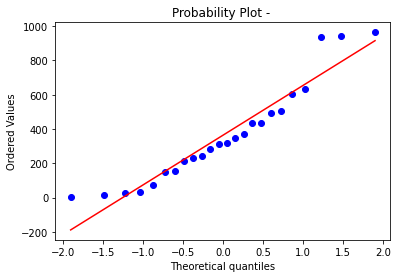

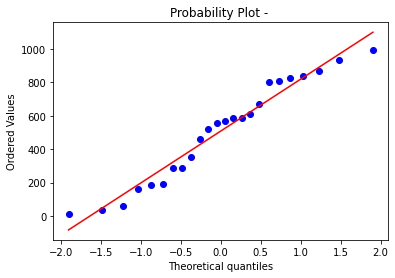

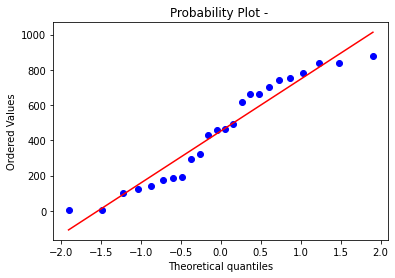

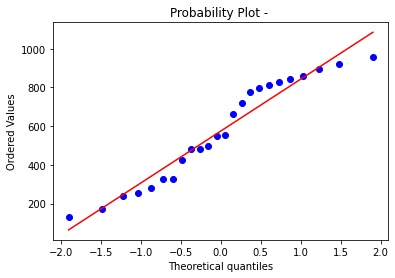

In [74]:
ejemplo.plot_normailidad()

# TEST ESTADISTICOS

## Variables normales y no normales

In [75]:
ejemplo.normalidad()

////////////////////////// TEST DE SHAPIRO CUANTITATIVAS ////////////////////////////
++++++++++++++++++++++++++++  Datos_D  ++++++++++++++++++++++++++

Variable cuantitativa Datos_D y test Shapiro < 0.05
ShapiroResult(statistic=0.908339262008667, pvalue=0.03246712312102318)


----------------------------------------------------------------------------------------------------

////////////////////////// TEST DE SHAPIRO DICOTOMICAS ////////////////////////////
++++++++++++++++++++++++++++  ES_PEPITO y Datos_D  ++++++++++++++++++++++++++

Agrupado por ES_PEPITO y por Datos_D y test Shapiro < 0.05
ES_PEPITO
n    (0.8430169224739075, 0.034588880836963654)
s     (0.8865155577659607, 0.08743171393871307)
Name: Datos_D, dtype: object


----------------------------------------------------------------------------------------------------

////////////////////////// TEST DE SHAPIRO DICOTOMICAS ////////////////////////////
++++++++++++++++++++++++++++  SEXO y Datos_F  ++++++++++++++++++++++++++

A

## Chi2

In [76]:
ejemplo.Chi()


-------------- Chi2 entre ES_PEPITO y es_pepito2 ----------------
p: 0.00022024132045215684 


-------------- Chi2 entre ES_PEPITO y SEXO ----------------
p: 0.5623426051791449 


-------------- Chi2 entre ES_PEPITO y sexo_2 ----------------
p: 0.5623426051791449 


-------------- Chi2 entre es_pepito2 y SEXO ----------------
p: 0.7762576671816586 


-------------- Chi2 entre es_pepito2 y sexo_2 ----------------
p: 0.7762576671816586 


-------------- Chi2 entre SEXO y sexo_2 ----------------
p: 9.63357008643095e-07 



## T_student

# Wilconxon

## Anova

In [77]:
ejemplo.anova()


----------- ANOVA Categoria Datos_B y variable continua Datos_D ----------

                sum_sq    df         F    PR(>F)
Datos_B   2.274704e+04   1.0  0.264553  0.612138
Residual  1.891626e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_E ----------

                sum_sq    df         F    PR(>F)
Datos_B   3.865975e+05   1.0  4.955699  0.036563
Residual  1.716235e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_F ----------

                sum_sq    df         F    PR(>F)
Datos_B   4.757481e+04   1.0  0.555657  0.463906
Residual  1.883618e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_G ----------

                sum_sq    df         F    PR(>F)
Datos_B   7.564824e+04   1.0  1.097707  0.306145
Residual  1.516126e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_cate_A y variable continua Datos_D ----------

                    su

In [78]:
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# print(fvalue, pvalue)
# # 17.492810457516338 2.639241146210922e-05

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Ordinary Least Squares (OLS) model
# model = ols('value ~ C(treatments)', data=df_melt).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table
# # output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

# # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
# from bioinfokit.analys import stat
# res = stat()
# res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary
# # output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# # note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# # (typ parameter) will produce similar results.

In [79]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
#  
# for x in categorical_col:
#     model = ols('cnt' + '~' + x, data = BIKE).fit() #Oridnary least square method
#     result_anova = sm.stats.anova_lm(model) # ANOVA Test
#     print(result_anova)

In [80]:
# array1=["a","b","c"]
# array2=["d","e","f","g"]
# array3=["g"]

# def combinatoria(lista):
#     if len(lista)>2:
#         for ind, i in enumerate(lista):
#             for j in range(ind+1,len(lista)):
#                 print(f"i es : {i}")
#                 print(f"j es : {lista[j]}\n")
#     else:
#         print("******************** No suficientes argumentos ********************")
# combinatoria(array3)
